© Alexander Jüstel, Fraunhofer IEG, Institution for Energy Infrastructures and Geothermal Systems, RWTH Aachen University,
GNU Lesser General Public License v3.0


This notebook was created by Alexander Jüstel and is part of the DGE Rollout Heat Demand Mapping project carried out by students of RWTH Aachen University within the framework of their master thesis. 

# Creating Masks for Interreg NWE Region for later intersection with input data

This notebook illustrates how to create Interreg NWE wide masks (10 km, 100 m) that are needed for the intersection with the input data. These larger masks are needed to ensure that there are no overlaps or gaps at boundaries of provided input data sets. 

# Import Libraries

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from tqdm import tqdm

import sys 
sys.path.insert(0, '../../../processing/')

import data_processing

# Loading the Interreg NWE Region

Here, we load the polygons of each country as GeoDataFrame to define the mask.

In [2]:
interreg_new_region = gpd.read_file('../../../data/outlines/shapes_nwe_region/Interreg_NWE_NUTS0_3034.shp')
interreg_new_region

,NAME_LATN,NUTS_NAME,area2,geometry
0,France,France,260768,"MULTIPOLYGON (((2930641.617 2531547.039, 29306..."
1,Great Britain,Great Britain,154556,"MULTIPOLYGON (((2874711.281 2699278.506, 28747..."
2,Ireland,Ireland,65150,"MULTIPOLYGON (((2651794.967 2994393.242, 26518..."
3,Netherlands,Netherlands,26826,"MULTIPOLYGON (((3667957.194 2938854.305, 36680..."
4,Scotland,Scotland,74237,"MULTIPOLYGON (((3075395.957 3245560.731, 30753..."
5,Schweiz/Suisse/Svizzera,Schweiz/Suisse/Svizzera,38663,"POLYGON ((3963266.327 2322163.044, 3963280.662..."
6,Luxembourg,Luxembourg,2421,"POLYGON ((3733429.004 2606067.737, 3733284.924..."
7,Germany,Germany,136800,"MULTIPOLYGON (((3954764.925 2330292.165, 39546..."
8,Belgium,Belgium,28595,"MULTIPOLYGON (((3496569.868 2727532.821, 34976..."


# Plotting the Interreg NWE Region

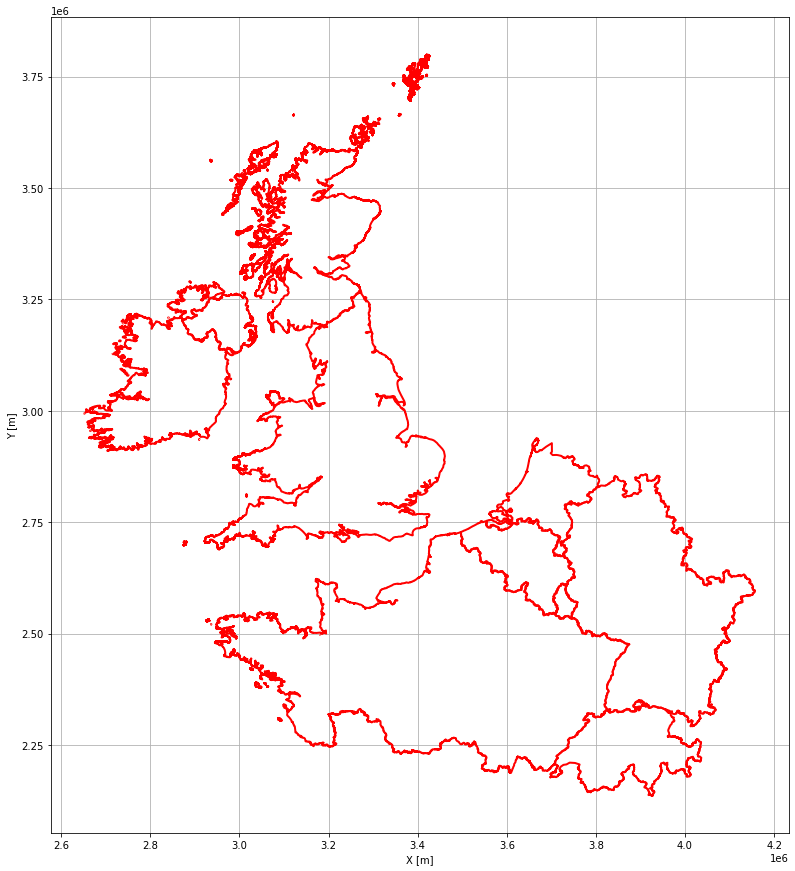

In [3]:
fig, ax = plt.subplots(figsize=(20,15))
interreg_new_region.boundary.plot(ax=ax, linewidth=2, color='red')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()

# Defining the boundaries of the mask

The boundaries of the mask will be defined by the total bounds of the Interreg NWE Region. The limits will be set manually and a Shapely Polygon will be created from the set limits and converted into a GeoDataFrame

In [4]:
interreg_new_region.total_bounds

array([2651470.87678118, 2135999.35335579, 4157176.32888511,
       3799567.81291717])

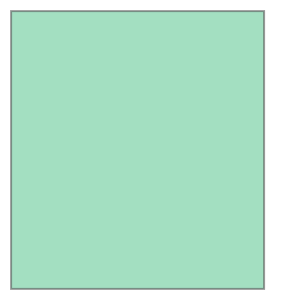

In [5]:
# Manually setting the limits of the mask
xmin = 2639984
xmax = 4169984
ymin = 2129951.5
ymax = 3809951.5

# Creating the mask polygon
polygon = Polygon([(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin)])
polygon

In [6]:
interreg_new_region_polygon = gpd.GeoDataFrame(geometry=[polygon],
                                               crs='EPSG:3034')
interreg_new_region_polygon

,geometry
0,"POLYGON ((2639984.000 2129951.500, 2639984.000..."


In [7]:
interreg_new_region_polygon.to_file('../../../data/masks/shapes_nwe_region/Interreg_NWE_Polygon_3034.shp')

In [8]:
interreg_new_region_polygon.to_crs('EPSG:4326').to_file('../../../data/masks/geojsons_nwe_region/Interreg_NWE_Polygon_3034.geojson', driver='GeoJSON')

# Plotting the Interreg NWE Region and the Polygon

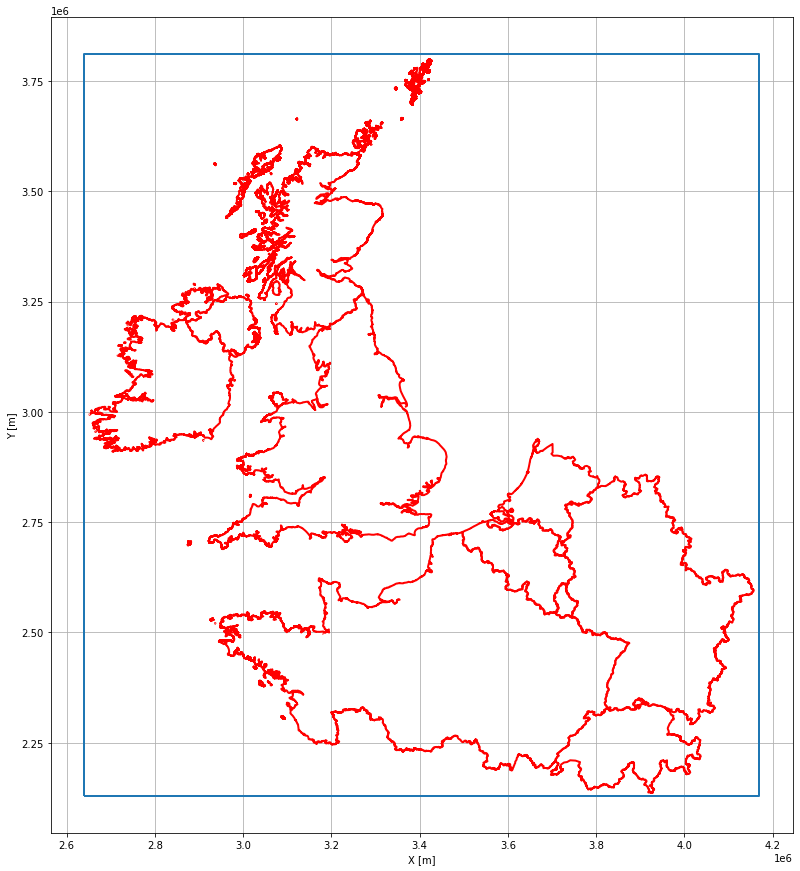

In [9]:
fig, ax = plt.subplots(figsize=(20,15))
interreg_new_region.boundary.plot(ax=ax, linewidth=2, color='red')
interreg_new_region_polygon.boundary.plot(ax=ax, linewidth=2)
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()

# Creating 10x10 km2 mask

In a first step, a mask with cells of 10x10 km2 each will be created. 

In [10]:
interreg_new_region_mask_10km = data_processing.create_polygon_mask(gdf=interreg_new_region_polygon, 
                                                                                        stepsize=10000)
interreg_new_region_mask_10km

,geometry
0,"POLYGON ((2639984.000 2129951.500, 2649984.000..."
1,"POLYGON ((2639984.000 2139951.500, 2649984.000..."
2,"POLYGON ((2639984.000 2149951.500, 2649984.000..."
3,"POLYGON ((2639984.000 2159951.500, 2649984.000..."
4,"POLYGON ((2639984.000 2169951.500, 2649984.000..."
...,...
25699,"POLYGON ((4159984.000 3759951.500, 4169984.000..."
25700,"POLYGON ((4159984.000 3769951.500, 4169984.000..."
25701,"POLYGON ((4159984.000 3779951.500, 4169984.000..."
25702,"POLYGON ((4159984.000 3789951.500, 4169984.000..."


# Plotting the mask

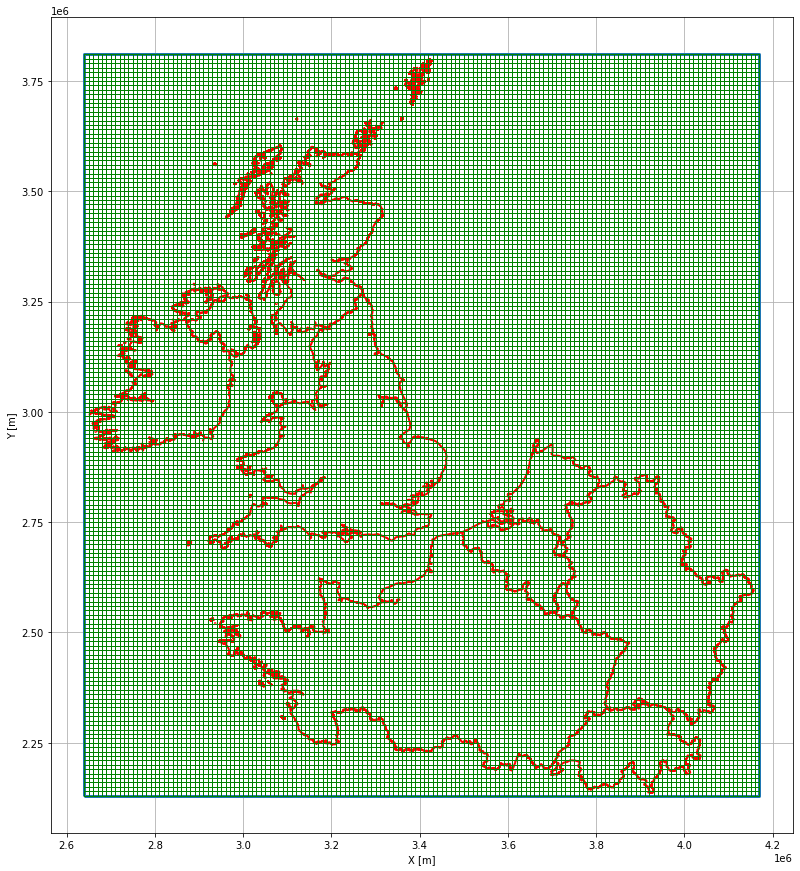

In [11]:
fig, ax = plt.subplots(figsize=(20,15))
interreg_new_region.boundary.plot(ax=ax, linewidth=2, color='red')
interreg_new_region_polygon.boundary.plot(ax=ax, linewidth=3)
interreg_new_region_mask_10km.boundary.plot(ax=ax, linewidth=1, color='green')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()

In [12]:
interreg_new_region_mask_10km.to_file('../../../data/masks/shapes_nwe_region/Interreg_NWE_mask_10km_3034.shp')

In [13]:
interreg_new_region_mask_10km.to_crs('EPSG:4326').to_file('../../../data/masks/geojsons_nwe_region/Interreg_NWE_mask_10km_3034.geojson', driver='GeoJSON')